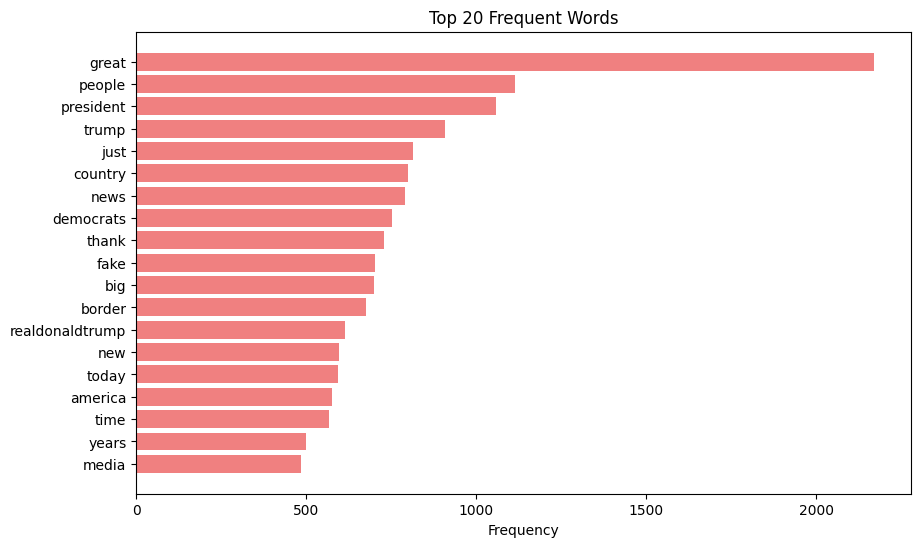

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv("E:/pythonProgram/Spillover/database/tweets/tweets.csv")

# 提取'text'字段
texts = df['text'].dropna()

# 使用CountVectorizer进行词频统计，排除"amp"这个词
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(texts)

# 获取词频
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# 创建词频DataFrame
word_freq_df = pd.DataFrame(list(zip(words, word_freq)), columns=['Word', 'Frequency'])

# 去掉"amp"词
word_freq_df = word_freq_df[word_freq_df['Word'] != 'amp']

# 排序
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# 绘制词云
plt.figure(figsize=(10,6))
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='lightcoral')  # 更改颜色为lightcoral
plt.xlabel('Frequency')
plt.title('Top 20 Frequent Words')
plt.gca().invert_yaxis()  # 翻转Y轴，使得词频最高的排在最上面
plt.show()


In [3]:
import pandas as pd

# 读取CSV文件
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets_first_term.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gold_first_term.csv")

# 将time列转换为datetime类型
tweets_df['time'] = pd.to_datetime(tweets_df['time'], format='%Y%m%d%H%M')
gold_df['time'] = pd.to_datetime(gold_df['time'], format='%Y%m%d%H%M')

# 创建一个布尔值mask，用于排除tweets_df中每个time点及其后60分钟的时间
exclude_mask = pd.Series([False] * len(gold_df))

# 对每一条tweets的时间，排除该时间点及其后60分钟内的数据
for tweet_time in tweets_df['time']:
    exclude_mask |= (gold_df['time'] >= tweet_time) & (gold_df['time'] <= tweet_time + pd.Timedelta(minutes=60))

# 过滤掉不在排除时间范围内的gold_df数据
filtered_gold_df = gold_df[~exclude_mask]

# 计算filtered_gold_df中Open列的平均值和方差
mean_open = filtered_gold_df['Open'].mean()
variance_open = filtered_gold_df['Open'].var()

print(f"Open列的平均值: {mean_open}")
print(f"Open列的方差: {variance_open}")


Open列的平均值: 1460.3604667153513
Open列的方差: 58895.02944804158


In [2]:
import pandas as pd

# 读取CSV文件
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gc_first_term.csv")

# 将time列转换为datetime类型
tweets_df['time'] = pd.to_datetime(tweets_df['time'])
gold_df['time'] = pd.to_datetime(gold_df['time'])

# 创建一个布尔值mask，用于排除tweets_df中每个time点及其后60分钟的时间
exclude_mask = pd.Series([False] * len(gold_df))

# 对每一条tweets的时间，排除该时间点及其后60分钟内的数据
for tweet_time in tweets_df['time']:
    exclude_mask |= (gold_df['time'] >= tweet_time) & (gold_df['time'] <= tweet_time + pd.Timedelta(minutes=60))

# 过滤掉不在排除时间范围内的gold_df数据
filtered_gold_df = gold_df[~exclude_mask]

# 计算相邻时间差为1分钟的涨跌幅
filtered_gold_df['return'] = filtered_gold_df['Open'].pct_change().where(
    filtered_gold_df['time'].diff() == pd.Timedelta(minutes=1)
)

# 计算涨跌幅的均值和方差
mean_return = filtered_gold_df['return'].mean()
var_return = filtered_gold_df['return'].var()
print(f"涨跌幅的均值: {mean_return}")
print(f"涨跌幅的方差: {var_return}")


涨跌幅的均值: 1.8625575748688781e-07
涨跌幅的方差: 6.13178463921377e-08


In [ ]:
import pandas as pd 

# 读取数据
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets_first_term.csv")

gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gc_first_term.csv")

# 确保time列是时间格式
tweets_df['time'] = pd.to_datetime(tweets_df['time'])
gold_df['time'] = pd.to_datetime(gold_df['time'])

# print(tweets_df.head())
# print(gold_df.head())

# 设置gold_df的索引为时间，以便更高效地查找
gold_df.set_index('time', inplace=True)

# 用于存储涨跌幅数据
open_changes = []
volume_changes = []

# 遍历每条tweets_df的时间
for tweet_time in tweets_df['time']:
    # 计算前一分钟的时间点
    time_window_end = tweet_time + pd.Timedelta(minutes=1)
    
    # 获取后一分钟的gold_df数据
    gold_after_tweet = gold_df.loc[time_window_end] if time_window_end in gold_df.index else None
    gold_when_tweet = gold_df.loc[tweet_time] if tweet_time in gold_df.index else None
    
    # 确保找到数据
    if gold_after_tweet is not None and gold_when_tweet is not None:
        #print("yeap")
        # 获取该条数据的Open和Volume列
        open_after = gold_after_tweet['Open']
        volume_after = gold_after_tweet['Volume']
        
        open_when = gold_when_tweet['Open']
        volume_when = gold_when_tweet['Volume']
        
        # 计算涨跌幅
        open_change = (open_after - open_when) / open_when * 100  # 计算涨跌幅
        volume_change = (volume_after - volume_when) / volume_when * 100
        
        # 将涨跌幅添加到列表中
        open_changes.append(open_change)
        volume_changes.append(volume_change)

# 计算均值和方差
open_mean = pd.Series(open_changes).mean()
open_variance = pd.Series(open_changes).var()

volume_mean = pd.Series(volume_changes).mean()
volume_variance = pd.Series(volume_changes).var()

# 输出均值和方差
print(f"Open的均值: {open_mean}, 方差: {open_variance}")
print(f"Volume的均值: {volume_mean}, 方差: {volume_variance}")


                 time            id  \
0 2017-01-20 00:40:00  8.222420e+17   
1 2017-01-20 12:31:00  8.224210e+17   
2 2017-01-20 17:51:00  8.225020e+17   
3 2017-01-20 17:51:00  8.225020e+17   
4 2017-01-20 17:52:00  8.225020e+17   

                                                text isRetweet isDeleted  \
0  Thank you for joining us at the Lincoln Memori...         f         f   
1  It all begins today! I will see you at 11:00 A...         f         f   
2  power from Washington, D.C. and giving it back...         f         f   
3  Today we are not merely transferring power fro...         f         f   
4  What truly matters is not which party controls...         f         f   

                device  favorites  retweets isFlagged  
0   Twitter for iPhone     144912     28556         f  
1  Twitter for Android     232628     57772         f  
2   Twitter for iPhone      78281     14880         f  
3   Twitter for iPhone      94860     16452         f  
4   Twitter for iPhone     1

In [5]:
import pandas as pd  

# 读取数据
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets_first_term.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gc_first_term.csv")

# 确保time列是时间格式
tweets_df['time'] = pd.to_datetime(tweets_df['time'])
gold_df['time'] = pd.to_datetime(gold_df['time'])

# 设置gold_df的索引为时间，以便更高效地查找
gold_df.set_index('time', inplace=True)

# 用于存储涨跌幅数据
open_changes = []
volume_changes = []

intervals=[1,2,5,10,15,30,45,60]

for interval in intervals:
    open_changes.clear()  # 清空涨跌幅数据列表
    volume_changes.clear()  # 清空涨跌幅数据列表
    
    # 遍历每条tweets_df的时间
    for tweet_time in tweets_df['time']:
        # 计算前一分钟的时间点
        time_window_start = tweet_time - pd.Timedelta(minutes=interval)
        time_window_end = tweet_time
        
        # 获取前一分钟和当前时间的gold_df数据
        gold_before_tweet = gold_df.loc[time_window_start] if time_window_start in gold_df.index else None
        gold_when_tweet = gold_df.loc[tweet_time] if tweet_time in gold_df.index else None
        
        # 确保找到数据
        if gold_before_tweet is not None and gold_when_tweet is not None:
            # 获取该条数据的Open和Volume列
            open_before = gold_before_tweet['Open']
            volume_before = gold_before_tweet['Volume']
            
            open_when = gold_when_tweet['Open']
            volume_when = gold_when_tweet['Volume']
            
            # 计算涨跌幅
            open_change = (open_when - open_before) / open_before * 100  # 计算涨跌幅
            volume_change = (volume_when - volume_before) / volume_before * 100
            
            # 将涨跌幅添加到列表中
            open_changes.append(open_change)
            volume_changes.append(volume_change)

    # 计算均值和方差
    open_mean = pd.Series(open_changes).mean()
    open_variance = pd.Series(open_changes).var()

    volume_mean = pd.Series(volume_changes).mean()
    volume_variance = pd.Series(volume_changes).var()

    # 输出interval相关信息以及科学计数法的均值和方差
    print(f"Interval {interval}分钟:")
    print(f"  Open的均值: {open_mean:.2e}, 方差: {open_variance:.2e}")
    print(f"  Volume的均值: {volume_mean:.2e}, 方差: {volume_variance:.2e}")


Interval 1分钟:
  Open的均值: -2.48e-04, 方差: 3.43e-04
  Volume的均值: 5.90e+01, 方差: 7.12e+04
Interval 2分钟:
  Open的均值: -1.44e-04, 方差: 6.44e-04
  Volume的均值: 9.09e+01, 方差: 3.68e+05
Interval 5分钟:
  Open的均值: -1.68e-04, 方差: 1.50e-03
  Volume的均值: 9.65e+01, 方差: 1.94e+05
Interval 10分钟:
  Open的均值: -1.89e-04, 方差: 2.86e-03
  Volume的均值: 1.04e+02, 方差: 3.93e+05
Interval 15分钟:
  Open的均值: 1.46e-04, 方差: 4.34e-03
  Volume的均值: 1.14e+02, 方差: 8.70e+05
Interval 30分钟:
  Open的均值: -1.03e-03, 方差: 9.08e-03
  Volume的均值: 1.28e+02, 方差: 4.43e+05
Interval 45分钟:
  Open的均值: 1.20e-03, 方差: 1.43e-02
  Volume的均值: 1.46e+02, 方差: 2.88e+06
Interval 60分钟:
  Open的均值: 1.41e-03, 方差: 2.01e-02
  Volume的均值: 1.26e+02, 方差: 6.17e+05


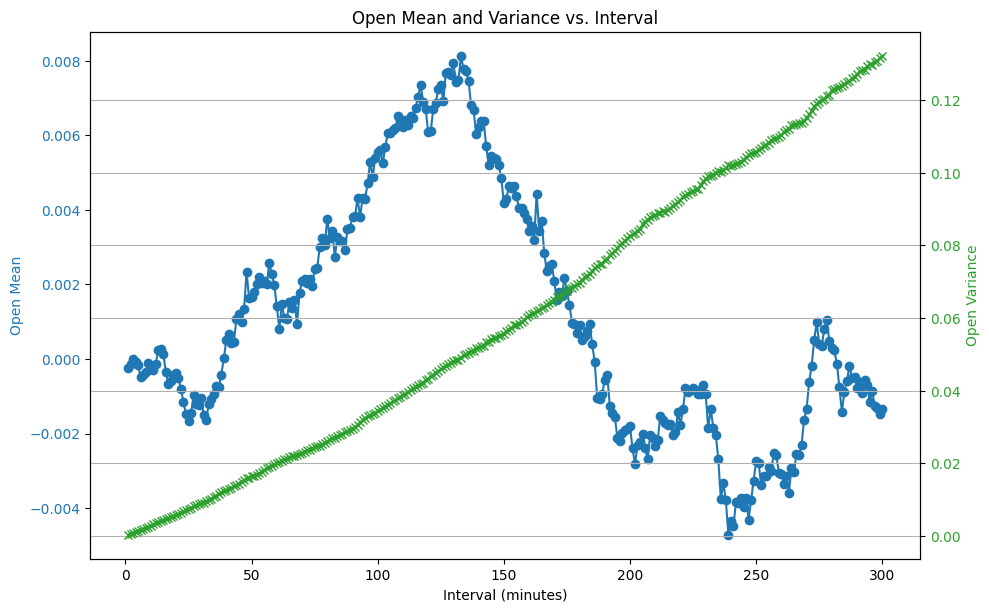

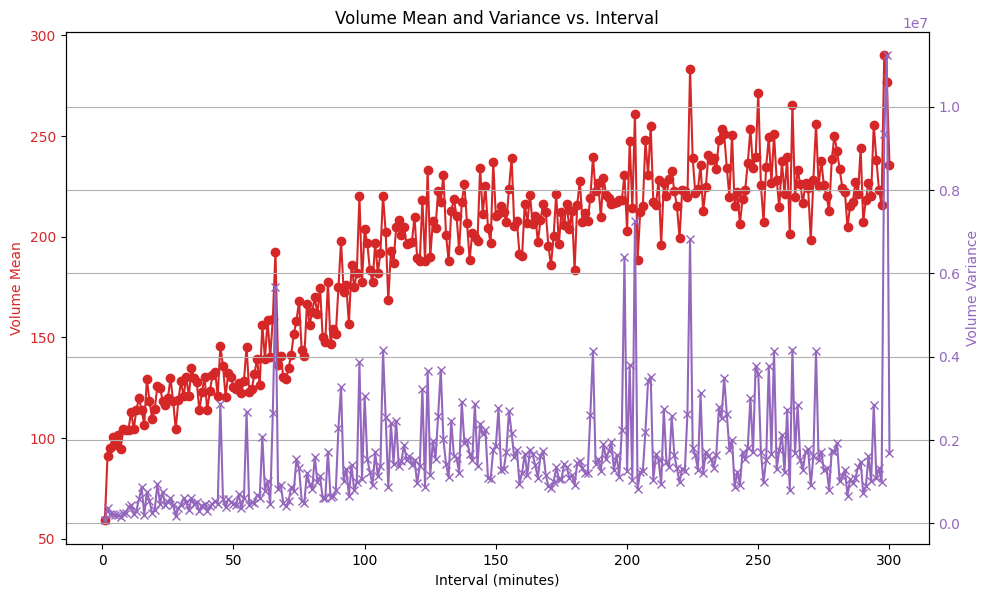

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets_first_term.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gc_first_term.csv")

# 确保time列是时间格式
tweets_df['time'] = pd.to_datetime(tweets_df['time'])
gold_df['time'] = pd.to_datetime(gold_df['time'])

# 设置gold_df的索引为时间，以便更高效地查找
gold_df.set_index('time', inplace=True)

# 用于存储涨跌幅数据
open_changes = []
volume_changes = []

# 设置interval范围从1到120分钟
intervals = list(range(1, 301))

open_means = []
open_variances = []
volume_means = []
volume_variances = []

for interval in intervals:
    open_changes.clear()  # 清空涨跌幅数据列表
    volume_changes.clear()  # 清空涨跌幅数据列表
    
    # 遍历每条tweets_df的时间
    for tweet_time in tweets_df['time']:
        # 计算前一分钟的时间点
        time_window_start = tweet_time - pd.Timedelta(minutes=interval)
        time_window_end = tweet_time
        
        # 获取前一分钟和当前时间的gold_df数据
        gold_before_tweet = gold_df.loc[time_window_start] if time_window_start in gold_df.index else None
        gold_when_tweet = gold_df.loc[tweet_time] if tweet_time in gold_df.index else None
        
        # 确保找到数据
        if gold_before_tweet is not None and gold_when_tweet is not None:
            # 获取该条数据的Open和Volume列
            open_before = gold_before_tweet['Open']
            volume_before = gold_before_tweet['Volume']
            
            open_when = gold_when_tweet['Open']
            volume_when = gold_when_tweet['Volume']
            
            # 计算涨跌幅
            open_change = (open_when - open_before) / open_before * 100  # 计算涨跌幅
            volume_change = (volume_when - volume_before) / volume_before * 100
            
            # 将涨跌幅添加到列表中
            open_changes.append(open_change)
            volume_changes.append(volume_change)

    # 计算均值和方差
    open_mean = pd.Series(open_changes).mean()
    open_variance = pd.Series(open_changes).var()

    volume_mean = pd.Series(volume_changes).mean()
    volume_variance = pd.Series(volume_changes).var()

    # 存储结果
    open_means.append(open_mean)
    open_variances.append(open_variance)
    volume_means.append(volume_mean)
    volume_variances.append(volume_variance)

    #输出interval相关信息以及科学计数法的均值和方差
    # print(f"\n{'-'*40}")
    # print(f"Interval: {interval} 分钟")
    # print(f"{'-'*40}")
    # print(f"{'Open 统计:':<15} 均值: {open_mean:.2e} | 方差: {open_variance:.2e}")
    # print(f"{'Volume统计:':<15} 均值: {volume_mean:.2e} | 方差: {volume_variance:.2e}")
    # print(f"{'-'*40}")


# 绘制Open的均值和方差
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Interval (minutes)')
ax1.set_ylabel('Open Mean', color='tab:blue')
ax1.plot(intervals, open_means, color='tab:blue', marker='o', label='Open Mean')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Open Variance', color='tab:green')
ax2.plot(intervals, open_variances, color='tab:green', marker='x', label='Open Variance')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Open Mean and Variance vs. Interval')
plt.grid(True)
plt.show()

# 绘制Volume的均值和方差
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Interval (minutes)')
ax1.set_ylabel('Volume Mean', color='tab:red')
ax1.plot(intervals, volume_means, color='tab:red', marker='o', label='Volume Mean')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume Variance', color='tab:purple')
ax2.plot(intervals, volume_variances, color='tab:purple', marker='x', label='Volume Variance')
ax2.tick_params(axis='y', labelcolor='tab:purple')

fig.tight_layout()
plt.title('Volume Mean and Variance vs. Interval')
plt.grid(True)
plt.show()


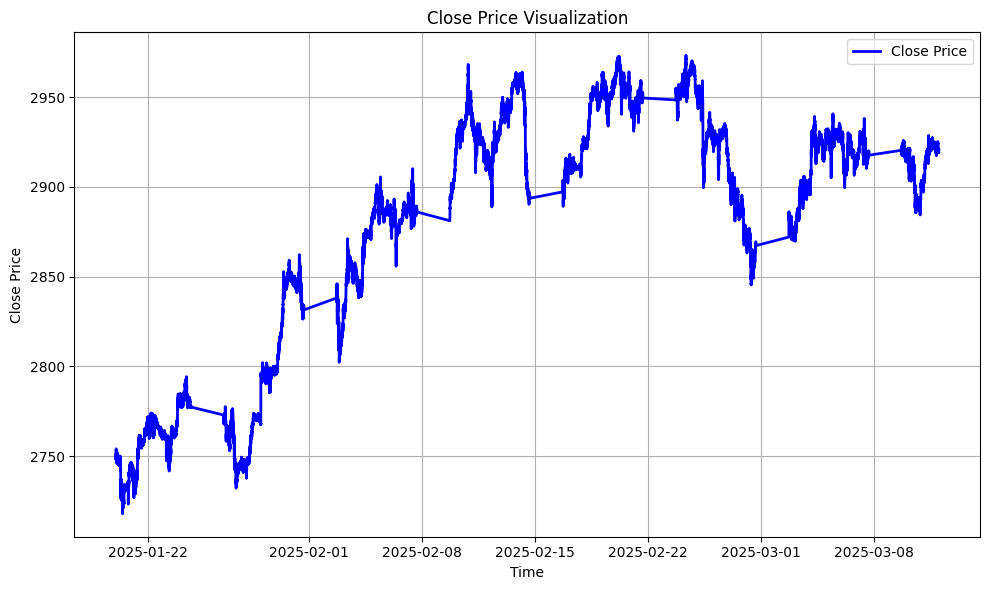

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv(r"D:\database\spillover\gc_second_term.csv")

# 确保时间列是日期格式，如果存在时间列
if 'time' in data.columns:
    data['time'] = pd.to_datetime(data['time'])

# 绘制 close 价格
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['Close'], label='Close Price', color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Close Price Visualization')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
daily_data=pd.read_csv("E:\pythonProgram\spillover\database\gold\gc_daily.csv")
daily_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Issac\AppData\Local\Temp\ipykernel_3932\2102144353.py:1: SyntaxWarning: invalid escape sequence '\p'
  daily_data=pd.read_csv("E:\pythonProgram\spillover\database\gold\gc_daily.csv")


,date,Open,Close,High,Low,Volume
0,2025-01-20,2749.0,2743.8,2754.8,2715.6,109626
1,2025-01-21,2743.8,2772.0,2772.3,2725.5,140133
2,2025-01-22,2771.8,2760.7,2774.4,2758.7,121511
3,2025-01-23,2760.7,2782.2,2784.9,2741.0,160518
4,2025-01-24,2782.3,2777.4,2794.8,2775.7,107482


In [7]:
#非特朗普影响的涨跌幅
import pandas as pd

# 读取CSV文件
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gold_first_term.csv")

# 将time列转换为datetime类型
tweets_df['time'] = pd.to_datetime(tweets_df['time'], format='%Y%m%d%H%M')
gold_df['time'] = pd.to_datetime(gold_df['time'], format='%Y%m%d%H%M')


# 筛选符合时间条件的数据
target_gold_df = gold_df[(gold_df['time'] >= tweet_time) & (gold_df['time'] <= tweet_time + pd.Timedelta(minutes=60))]

# 计算相邻时间差为1分钟的涨跌幅
target_gold_df['return'] = target_gold_df['Open'].pct_change().where(
    target_gold_df['time'].diff() == pd.Timedelta(minutes=1)
)

# 计算涨跌幅的均值和方差
mean_return = target_gold_df['return'].mean()
var_return = target_gold_df['return'].var()
print(f"涨跌幅的均值: {mean_return}")
print(f"涨跌幅的方差: {var_return}")




涨跌幅的均值: 2.6402860214495374e-05
涨跌幅的方差: 3.1612492567169625e-08


C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\4095137321.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_gold_df['return'] = target_gold_df['Open'].pct_change().where(


In [ ]:
import pandas as pd

# 读取CSV文件
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gold_first_term.csv")

# 将time列转换为datetime类型
tweets_df['time'] = pd.to_datetime(tweets_df['time'], format='%Y%m%d%H%M')
gold_df['time'] = pd.to_datetime(gold_df['time'], format='%Y%m%d%H%M')

# 设置计算涨跌幅的时间间隔
time_intervals = [1, 3, 5, 10, 15, 30, 45, 60]

# 循环遍历所有的 tweet 时间
for tweet_time in tweets_df['time']:
    # 循环计算不同时间间隔的涨跌幅
    for interval in time_intervals:
        # 筛选符合时间条件的数据
        target_gold_df = gold_df[(gold_df['time'] >= tweet_time) & (gold_df['time'] <= tweet_time + pd.Timedelta(minutes=interval))]
        
        # 计算涨跌幅
        target_gold_df['return'] = target_gold_df['Open'].pct_change().where(
            target_gold_df['time'].diff() == pd.Timedelta(minutes=1)
        )
        
        # 计算涨跌幅的均值和方差
        mean_return = target_gold_df['return'].mean()
        var_return = target_gold_df['return'].var()
        
        print(f"Tweet时间 {tweet_time}，{interval}分钟的涨跌幅的均值: {mean_return}")
        print(f"Tweet时间 {tweet_time}，{interval}分钟的涨跌幅的方差: {var_return}")


1分钟的涨跌幅的均值: 0.00016565890830788632
1分钟的涨跌幅的方差: nan
3分钟的涨跌幅的均值: 9.146109499387952e-09
3分钟的涨跌幅的方差: 2.7438328749169847e-08
5分钟的涨跌幅的均值: -3.312629399587763e-05
5分钟的涨跌幅的方差: 1.9208193720386934e-08
10分钟的涨跌幅的均值: 1.6578240238662723e-05
10分钟的涨跌幅的方差: 3.018999294498581e-08
15分钟的涨跌幅的均值: 1.1053988926601477e-05
15分钟的涨跌幅的方差: 2.339219668026625e-08
30分钟的涨跌幅的均值: 1.6570462788830416e-05
30分钟的涨跌幅的方差: 1.7690675742532532e-08
45分钟的涨跌幅的均值: 7.371299851456471e-06
45分钟的涨跌幅的方差: 2.0197268673109784e-08
60分钟的涨跌幅的均值: -1.7944333835025656e-05
60分钟的涨跌幅的方差: 2.350217875818758e-08


C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\2931988380.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_gold_df['return'] = target_gold_df['Open'].pct_change().where(
C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\2931988380.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_gold_df['return'] = target_gold_df['Open'].pct_change().where(
C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\2931988380.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [1]:
import pandas as pd

# 读取CSV文件
tweets_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\tweets\tweets.csv")
gold_df = pd.read_csv(r"E:\pythonProgram\Spillover\database\gold\gold_first_term.csv")

# 将time列转换为datetime类型
tweets_df['time'] = pd.to_datetime(tweets_df['time'], format='%Y%m%d%H%M')
gold_df['time'] = pd.to_datetime(gold_df['time'], format='%Y%m%d%H%M')

# 创建一个布尔值mask，用于排除tweets_df中每个time点及其后60分钟的时间
exclude_mask = pd.Series([False] * len(gold_df))

# 对每一条tweets的时间，排除该时间点及其后60分钟内的数据
for tweet_time in tweets_df['time']:
    exclude_mask |= (gold_df['time'] >= tweet_time) & (gold_df['time'] <= tweet_time + pd.Timedelta(minutes=60))

# 过滤掉不在排除时间范围内的gold_df数据
filtered_gold_df = gold_df[~exclude_mask]

# 计算每个时间点的 (Open - 前一天的Open) / 前一天的Open
filtered_gold_df['prev_Open'] = filtered_gold_df['Open'].shift(1)
filtered_gold_df['open_diff'] = (filtered_gold_df['Open'] - filtered_gold_df['prev_Open']) / filtered_gold_df['prev_Open']

# 计算open_diff列的平均值和方差
mean_open_diff = filtered_gold_df['open_diff'].mean()
variance_open_diff = filtered_gold_df['open_diff'].var()

print(f"Open差异列的平均值: {mean_open_diff}")
print(f"Open差异列的方差: {variance_open_diff}")


Open差异列的平均值: 3.941459304735042e-07
Open差异列的方差: 7.29346804095748e-08


C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\785522633.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gold_df['prev_Open'] = filtered_gold_df['Open'].shift(1)
C:\Users\Issac\AppData\Local\Temp\ipykernel_26900\785522633.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gold_df['open_diff'] = (filtered_gold_df['Open'] - filtered_gold_df['prev_Open']) / filtered_gold_df['prev_Open']
